In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [2]:
# df_pathway = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
# 对pathway_name进行去重，打印
# df_pathway['pathway_class'].drop_duplicates()

In [52]:
# Axitinib Navitoclax Picolinici-acid Campthotecin BMS-754807 Afatinib Erlotinib Gefitinib
# EGFR
drug_name = 'Osimertinib' # 靶向药物 EGFR
# target_pathway = ['EGFR tyrosine kinase inhibitor resistance','Non-small cell lung cancer','MAPK signaling pathway','PI3K signaling','Cell cycle','Apoptosis,'Small cell lung cancer']
target_pathway = ['MAPK signaling','PI3K signaling','ERK signaling','Apoptosis','TGFB signaling']
target_pathway_detail = ['KEGG_MEDICUS_REFERENCE_GF_RTK_RAS_PI3K_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_GF_RTK_RAS_ERK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_JNK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_PATHWAY_ADAPTOR_PROTEINS','KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_UBIQUITINATION_OF_RTK_BY_CBL','KEGG_MEDICUS_REFERENCE_ERK_RSK_SIGNALING','KEGG_MEDICUS_REFERENCE_MLK_JNK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_PP2A_AKT_SIGNALING_PATHWA']

In [4]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [5]:
df_smiles = pd.read_csv('../../data/CCLE-GDSC-SMILES.csv')
df_smiles.head()

,CID,SMILES,DRUG_NAME
0,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,Camptothecin
1,13342,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,Vinblastine
2,5702198,N.N.Cl[Pt]Cl,Cisplatin
3,6253,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,Cytarabine
4,148124,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,Docetaxel


In [6]:
# 筛选出药物是Oxaliplatin
df_smiles_single_drug = df_smiles[df_smiles['DRUG_NAME'] == drug_name]
df_smiles_single_drug.head()

,CID,SMILES,DRUG_NAME
42,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,Erlotinib


In [7]:
# df_smiles_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_smiles_attentions_gep.csv')
df_smiles_att = pd.read_csv('../../data/TransMCA_Smiles_Attention_lung_CellBlind_GEP_V2.csv')

df_smiles_att.head()

,drug,cell_line,OncotreeCode,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,5-Fluorouracil,OPM2,PCM,0.006347,0.006383,0.005372,0.003797,0.003524,0.002993,0.002993,...,0.015813,0.047711,0.007728,0.007877,0.006743,0.009487,0.005599,0.007475,0.009594,0.006176
1,5-azacytidine,OPM2,PCM,0.006201,0.006226,0.005253,0.003639,0.003361,0.002822,0.002822,...,0.011525,0.005538,0.009988,0.019466,0.035713,0.007642,0.007479,0.009429,0.017573,0.004548
2,A-366,OPM2,PCM,0.004454,0.004525,0.003958,0.003003,0.002831,0.002495,0.002495,...,0.005053,0.008609,0.009501,0.018177,0.012506,0.011370,0.005317,0.005464,0.008615,0.007041
3,ABT737,OPM2,PCM,0.003465,0.003512,0.003176,0.002613,0.002507,0.002299,0.002299,...,0.004663,0.005300,0.006625,0.006120,0.003309,0.003640,0.005801,0.003944,0.005648,0.004245
4,AGI-5198,OPM2,PCM,0.003912,0.003960,0.003499,0.002729,0.002589,0.002313,0.002313,...,0.004239,0.007917,0.007533,0.006822,0.007061,0.016505,0.017535,0.010239,0.010574,0.007183


In [53]:
# 筛选出药物是Oxaliplatin
df_smiles_att_single_drug = df_smiles_att[df_smiles_att['drug'] == drug_name]
# 筛选出cell_line = ['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1']
# NSCLC:['EKVX','HCC827','LCLC103H','NCIH1299','NCIH2170','NCIH2228','PC14','RERFLCSQ1']
# LUAD:['NCIH2228','HCC827','EKVX','PC14']
# SCLC:['NCIH526','LU135','NCIH146','NCIH1963']
cell_line = ['PC14'] # LUAD 发生EGFR突变：HCC827，PC14
# cell_line = ['EKVX','NCIH2228']
# cell_line = ['NCIH526','LU135','NCIH146','NCIH1963']
df_smiles_att_single_drug = df_smiles_att_single_drug[df_smiles_att_single_drug['cell_line'].isin(cell_line)]
print(df_smiles_att_single_drug.shape)
df_smiles_att_single_drug.head()

(1, 259)


,drug,cell_line,OncotreeCode,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
9854,Osimertinib,PC14,LUAD,0.004968,0.004995,0.004369,0.003152,0.002857,0.002339,0.002339,...,0.009658,0.0033,0.008622,0.007961,0.004527,0.007883,0.00922,0.004443,0.019913,0.0058


In [54]:
# 读取drug_sensitivity数据
df_drug_sensitivity = pd.read_csv('../../data/drug_sensitivity_lung_CellBlind_test&prediction_V2.csv')
# drug_name = ['Erlotinib','Gefitinib','Afatinib','Osimertinib']
# 筛选出cell_line = ['NCIH2228','HCC827','EKVX','PC14']，drug = Gefitinib的数据
df_drug_sensitivity_single_drug = df_drug_sensitivity[(df_drug_sensitivity['cell_line'].isin(cell_line)) & (df_drug_sensitivity['drug'] == drug_name)] #  & (df_drug_sensitivity['drug'] == drug_name)
print(df_drug_sensitivity_single_drug.shape)
df_drug_sensitivity_single_drug.head()

(1, 6)


,Unnamed: 0,drug,cell_line,IC50,OncotreeCode,prediction
9854,9854,Osimertinib,PC14,-3.304462,LUAD,1.578242


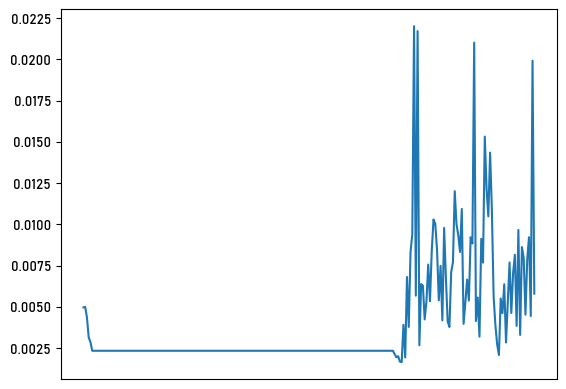

In [55]:
# 将df_smiles_att_oxaliplatin从第四列开始的数据取均值
df_smiles_att_single_drug_mean = df_smiles_att_single_drug.iloc[:, 3:].mean(axis=0)
# 将df_smiles_att_oxaliplatin_mean画成折线图
plt.plot(df_smiles_att_single_drug_mean)
# 不显示X轴的信息
plt.xticks([])
plt.show()

In [11]:
from pytoda.smiles import SMILESTokenizer
smiles_language_filepath = '../../../data/smiles_language/tokenizer_customized'
# Load SMILES language
smiles_language = SMILESTokenizer.from_pretrained(smiles_language_filepath)
smiles_language.set_encoding_transforms(
    add_start_and_stop=True,
    padding=True,
    padding_length=256,
    # padding_length=params.get("smiles_padding_length", None),
)
smiles_language.set_smiles_transforms(
    augment=False,
    canonical=False,
    kekulize=False,
    all_bonds_explicit=False,
    all_hs_explicit=False,
    remove_bonddir=False,
    remove_chirality=False,
    selfies=False,
    sanitize=False,
)
smiles_language.add_dataset(df_smiles['SMILES'])

In [56]:
single_drug = smiles_language.smiles_to_token_indexes(df_smiles[df_smiles['DRUG_NAME'] == drug_name]['SMILES'].values[0])
single_drug_num_array = np.array(single_drug)
type(single_drug_num_array)

numpy.ndarray

In [57]:
# 根据dict将Oxaliplatin从数字替换成字符
single_drug_strs = [list(dict.keys())[list(dict.values()).index(i)] for i in single_drug]
# 将Oxaliplatin转换成ndarray
single_drug_strs = np.array(single_drug_strs)
type(single_drug_strs)

numpy.ndarray

In [58]:
df_smiles_att_oxaliplatin_mean = df_smiles_att_single_drug_mean.to_numpy()
type(df_smiles_att_oxaliplatin_mean)

numpy.ndarray

In [59]:
single_drug_observe = np.vstack([single_drug_num_array, single_drug_strs, df_smiles_att_oxaliplatin_mean])
single_drug_observe

array([['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [60]:
start = 182
end = 255
# 取single_drug_observe224-255的数据
single_drug_observe_224_255 = single_drug_observe[:, start:end]
# dataframe
# single_drug_observe_224_255 = pd.DataFrame(single_drug_observe_224_255)
single_drug_observe_224_255

array([['38', '36', '6', '38', '37', '38', '4', '38', '7', '37', '38',
        '38', '37', '38', '38', '37', '38', '7', '6', '5', '38', '8',
        '37', '36', '38', '4', '37', '36', '38', '37', '38', '8', '5',
        '36', '38', '9', '37', '38', '4', '38', '37', '38', '4', '38',
        '4', '37', '38', '9', '5', '36', '38', '4', '37', '35', '5',
        '38', '37', '38', '5', '36', '4', '38', '5', '38', '38', '36',
        '4', '38', '5', '38', '5', '35', '38'],
       ['C', 'N', '1', 'C', '=', 'C', '(', 'C', '2', '=', 'C', 'C', '=',
        'C', 'C', '=', 'C', '2', '1', ')', 'C', '3', '=', 'N', 'C', '(',
        '=', 'N', 'C', '=', 'C', '3', ')', 'N', 'C', '4', '=', 'C', '(',
        'C', '=', 'C', '(', 'C', '(', '=', 'C', '4', ')', 'N', 'C', '(',
        '=', 'O', ')', 'C', '=', 'C', ')', 'N', '(', 'C', ')', 'C', 'C',
        'N', '(', 'C', ')', 'C', ')', 'O', 'C'],
       ['0.001932161', '0.006809622', '0.003784059', '0.008320312',
        '0.009399416', '0.02200126', '0.0056772

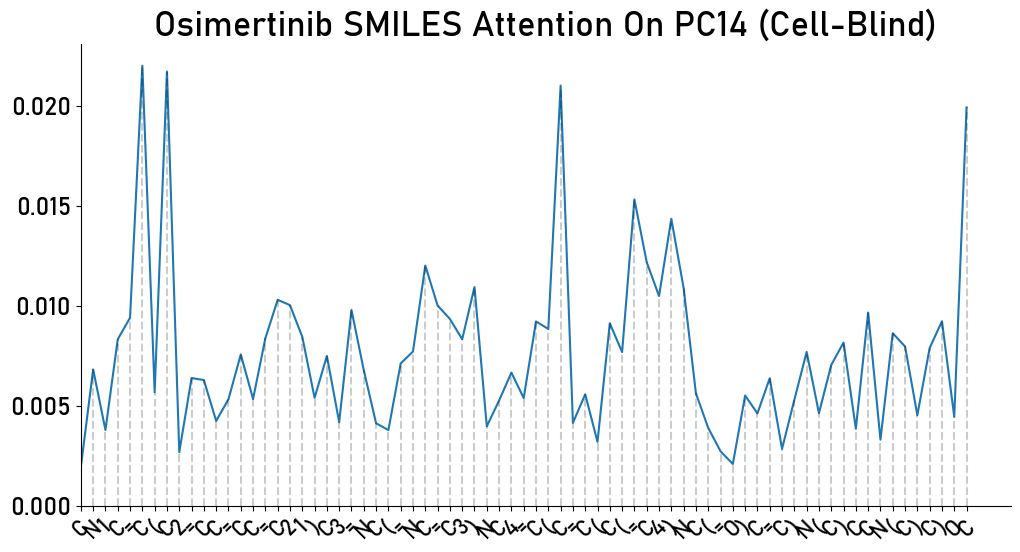

In [61]:
# 将single_drug_observe_224_255画成折线图,第三行是attention，是数值型，所以画成折线图
# 将single_drug_observe_224_255[2]变成浮点数  
single_drug_observe_y = single_drug_observe_224_255[2].astype(float)
single_drug_observe_x = single_drug_observe_224_255[1]
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(single_drug_observe_y)
# 每个点与X轴加上虚线
for i in range(len(single_drug_observe_y)):
    plt.vlines(i, 0, single_drug_observe_y[i], linestyles='dashed', colors='black', alpha=0.2)
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On PC14 (Cell-Blind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), single_drug_observe_x)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_Cell_Blind.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
df_pathways_att = pd.read_csv('../../data/TransMCA_Pathway_Attention_lung_CellBlind_GEP_V2.csv')
# 筛选出drug = Oxaliplatin
df_pathways_att_single_drug = df_pathways_att[df_pathways_att['drug'] == drug_name]
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_pathways_att_single_drug = df_pathways_att_single_drug[df_pathways_att_single_drug['cell_line'].isin(cell_line)]
print(df_pathways_att_single_drug.shape)
df_pathways_att_single_drug.head()

(1, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
9854,Osimertinib,PC14,LUAD,0.000867,0.001416,0.001374,0.002471,0.00168,0.001218,0.001798,...,0.00036,0.00133,0.00115,0.001433,0.001636,0.001799,0.002355,0.001438,0.00231,0.001423


In [64]:
# 将df_pathways_att_oxaliplatin从第四列开始的数据取均值
df_pathways_single_drug_mean = df_pathways_att_single_drug.iloc[:, 3:].mean(axis=0)
df_pathways_single_drug_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            0.000867
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.001416
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      0.001374
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.002471
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.001680
dtype: float64

In [65]:
df_pathways_info_origin = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
df_pathways_info_origin.head()

,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
0,0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,N01394,Env factor,Mitochondrial ROS formation
1,1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,N01401,Env factor,CYP-mediated ROS formation
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,N01352,Env factor,ERK signaling
3,3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,N01386,Env factor,DNA adduct formation
4,4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,N01364,Env factor,Nuclear receptor signaling


In [66]:
# 筛选出pathway_class是target_pathway的数据  二选一
df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_class'].isin(target_pathway)]
# 筛选出df_pathways_info中pathway_name包含EGFR或者ERBB2的数据
# df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].str.contains('EGFR|ERBB2')]
print(df_pathways_info.shape)
df_pathways_info.head()

(59, 5)


,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,N01352,Env factor,ERK signaling
5,5,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,N01353,Env factor,ERK signaling
10,10,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_RAS_ERK_SIGNALING_PATHWAY,N01408,Env factor,ERK signaling
12,12,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_PI3K_SIGNALING_PATHWAY,N01348,Env factor,PI3K signaling
14,14,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_PI3K_SIGNALING_PATHWAY_N01339,N01339,Env factor,PI3K signaling


In [22]:
# 筛选出pathway_class是target_pathway的数据  二选一
# df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].isin(target_pathway_detail)]
# print(df_pathways_info.shape)
# df_pathways_info.head()

In [67]:
df_gep = pd.read_csv('../../data/GeneExp_Wilcoxon_test_Analysis_Log10_P_value_C2_KEGG_MEDICUS.csv')
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_gep = df_gep[df_gep['cell_line'].isin(cell_line)]
# 从第二列开始取均值
df_gep_mean = df_gep.iloc[:, 1:].mean(axis=0)
df_gep_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            4.352209
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            1.894415
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      2.017583
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.047460
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    1.276917
dtype: float64

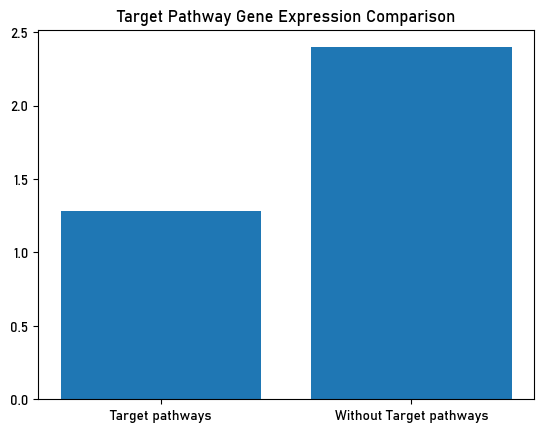

In [68]:
# 从df_gep_mean取出DNA_replication的数据
df_gep_mean_DNA_replication = df_gep_mean[df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
df_gep_mean_without_DNA_replication = df_gep_mean[~df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_gep_mean_DNA_replication.mean(), df_gep_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Gene Expression Comparison')
plt.show()

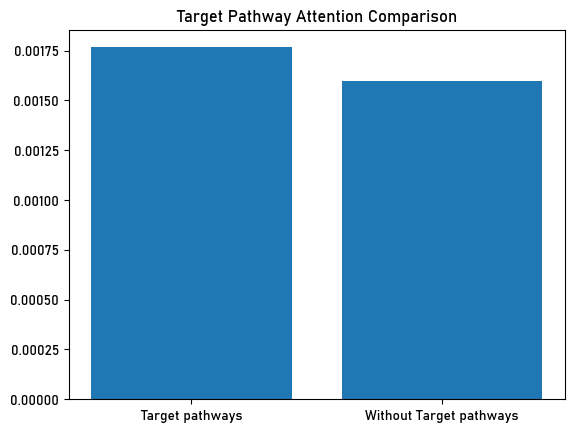

In [69]:
DNA_replication_pathways = df_pathways_info['pathway_name']
# 从df_pathways_att_oxaliplatin_mean取出DNA_replication_pathways的数据
df_pathways_att_oxaliplatin_mean_DNA_replication = df_pathways_single_drug_mean[df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
df_pathways_att_mean_without_DNA_replication = df_pathways_single_drug_mean[~df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_pathways_att_oxaliplatin_mean_DNA_replication.mean(), df_pathways_att_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Attention Comparison')
plt.show()

In [70]:
# 将df_pathways_single_drug_mean设置为dataframe
df_pathways_single_drug_mean = pd.DataFrame(df_pathways_single_drug_mean)
df_pathways_single_drug_mean.columns = ['attention']
df_pathways_single_drug_mean['pathway_name'] = df_pathways_single_drug_mean.index

In [71]:
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
# 根据attention排序
df_pathways_single_drug_mean = df_pathways_single_drug_mean.sort_values(by='attention', ascending=False)
print(df_pathways_single_drug_mean.shape)
df_pathways_single_drug_mean.head()

(619, 2)


,attention,pathway_name
515,0.002500,KEGG_MEDICUS_VARIANT_LRP6_OVEREXPRESSION_TO_WNT_SIGNALING_PATHWAY
358,0.002495,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALING_PATHWAY
137,0.002494,KEGG_MEDICUS_REFERENCE_AVP_V2R_PKA_SIGNALING_PATHWAY
169,0.002494,KEGG_MEDICUS_REFERENCE_CCR5_GNB_G_PLCB_G_PKC_SIGNALING_PATHWAY
266,0.002493,KEGG_MEDICUS_REFERENCE_GPCR_PI3K_SIGNALING_PATHWAY


In [72]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head()

(59, 6)


,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002495,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALING_PATHWAY,358,N01163,Reference,PI3K signaling
1,0.002493,KEGG_MEDICUS_REFERENCE_GPCR_PI3K_SIGNALING_PATHWAY,266,N01657,Reference,PI3K signaling
2,0.002474,KEGG_MEDICUS_REFERENCE_NODAL_SIGNALING_PATHWAY,350,N01459,Reference,TGFB signaling
3,0.002410,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATHWAY_AUXILIARY_FACTOR,153,N01461,Reference,TGFB signaling
4,0.002381,KEGG_MEDICUS_REFERENCE_AMH_SIGNALING_PATHWAY,116,N01454,Reference,TGFB signaling


In [73]:
# 将df_pathways_single_drug_mean中pathway_name列存在在DNA_replication_pathways中，颜色标注为红色，其余为蓝色
df_pathways_single_drug_mean['color'] = np.where(df_pathways_single_drug_mean['pathway_name'].isin(DNA_replication_pathways), 'r', 'b')
# 重置索引
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
df_pathways_single_drug_mean.head(50)

,attention,pathway_name,color
0,0.002500,KEGG_MEDICUS_VARIANT_LRP6_OVEREXPRESSION_TO_WNT_SIGNALING_PATHWAY,b
1,0.002495,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALING_PATHWAY,r
2,0.002494,KEGG_MEDICUS_REFERENCE_AVP_V2R_PKA_SIGNALING_PATHWAY,b
3,0.002494,KEGG_MEDICUS_REFERENCE_CCR5_GNB_G_PLCB_G_PKC_SIGNALING_PATHWAY,b
4,0.002493,KEGG_MEDICUS_REFERENCE_GPCR_PI3K_SIGNALING_PATHWAY,r
5,0.002493,KEGG_MEDICUS_REFERENCE_NOTCH_SIGNALING_PATHWAY,b
6,0.002492,KEGG_MEDICUS_REFERENCE_NLRP3_INFLAMMASOME_SIGNALING_PATHWAY,b
7,0.002492,KEGG_MEDICUS_REFERENCE_HYDROLYSIS_OF_SPHINGOMYELIN,b
8,0.002492,KEGG_MEDICUS_REFERENCE_BILE_ACID_BIOSYNTHESIS,b
9,0.002491,KEGG_MEDICUS_REFERENCE_TSH_TG_SIGNALING_PATHWAY,b


中值: 0.001591331


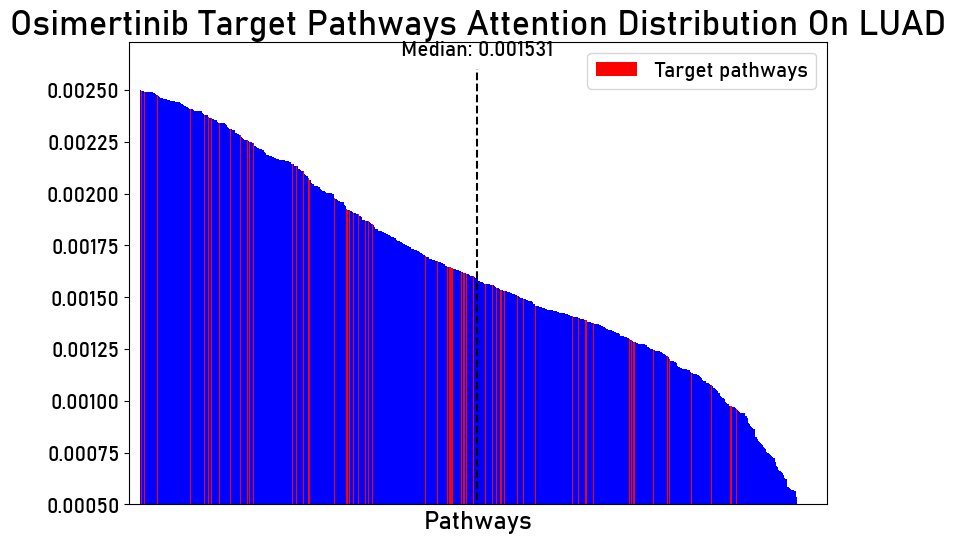

In [74]:
# 设置画布大小
plt.figure(figsize=(9, 6))
# 画出df_pathways_single_drug_mean的柱状图
plt.bar(df_pathways_single_drug_mean['pathway_name'], df_pathways_single_drug_mean['attention'], color=df_pathways_single_drug_mean['color'],width=1)
# 在柱状图的中值上画一条竖线,在竖线上标注中值
plt.vlines(309, 0, 0.0026, linestyles='dashed', colors='black', alpha=1)
# plt.text(309, 0.0026, 'Median', ha='center', va='bottom', fontsize=10)
# 在图中标注中值
plt.text(309, 0.00265, 'Median: 0.001531', ha='center', va='bottom', fontsize=15)
# 画一个label：红色代表Target pathways
plt.bar([0], [0], color='r', label='Target pathways')
# 画一个label：蓝色代表Without Target pathways
# plt.bar([0], [0], color='b', label='Without Target pathways')
# 显示label
plt.legend(fontsize=15)
# 打印出中值
print('中值:',df_pathways_single_drug_mean['attention'].median())
plt.title(drug_name + ' Target Pathways Attention Distribution On LUAD', fontsize=25)
plt.xticks([])
plt.yticks(fontsize=15)
plt.ylim(bottom=0.0005)
plt.xlim(left=-10, right=630)
plt.xlabel('Pathways', fontsize=18)
# 保存图片
# plt.savefig(drug_name + '_NSCLC_Target_Pathway_Attention_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
# 帮我找出所有color为r的index
target_pathways = df_pathways_single_drug_mean[df_pathways_single_drug_mean['color'] == 'r']
# 将每个index除以618，得到比例
p = (target_pathways.index+1) / 619
print('所占百分比:',p)

所占百分比: Index([0.0016155088852988692,  0.009693053311793215,   0.01938610662358643,
        0.035541195476575124,   0.06462035541195477,   0.06623586429725363,
         0.07754442649434572,    0.0840064620355412,   0.08723747980613894,
         0.09046849757673667,   0.12924071082390953,   0.13893376413570274,
         0.14054927302100162,   0.14378029079159935,   0.15024232633279483,
         0.16155088852988692,    0.1841680129240711,   0.20678513731825526,
          0.2197092084006462,    0.2245557350565428,    0.2520193861066236,
          0.2940226171243942,   0.30048465266558966,     0.308562197092084,
          0.3150242326332795,   0.35218093699515346,   0.35379644588045234,
         0.36348949919224555,    0.3715670436187399,   0.37964458804523427,
           0.407108239095315,   0.49434571890145396,    0.5169628432956381,
          0.5282714054927302,    0.5363489499192245,    0.5428109854604201,
          0.5492730210016155,    0.5638126009693053,    0.5702746365105008,
     

In [32]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head(100)

(59, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002671,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,r,153,N01461,Reference,TGFB signaling
1,0.002667,KEGG_MEDICUS_REFERENCE_AMH_SIGNALING_PATHWAY,r,116,N01454,Reference,TGFB signaling
2,0.002663,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,r,358,N01163,Reference,PI3K signaling
3,0.002631,KEGG_MEDICUS_REFERENCE_ERK_RSK_SIGNALING,r,238,N01601,Reference,MAPK signaling
4,0.002513,KEGG_MEDICUS_REFERENCE_BCR_BCAP_CD19_PI3K_SIGN...,r,141,N01695,Reference,PI3K signaling
5,0.002508,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATHWAY,r,152,N01458,Reference,TGFB signaling
6,0.002492,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RA...,r,399,N01595,Reference,MAPK signaling
7,0.002482,KEGG_MEDICUS_REFERENCE_BMP15_SIGNALING_PATHWAY,r,150,N01455,Reference,TGFB signaling
8,0.002467,KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNAL...,r,377,N01165,Reference,PI3K signaling
9,0.002465,KEGG_MEDICUS_REFERENCE_NODAL_SIGNALING_PATHWAY,r,350,N01459,Reference,TGFB signaling


In [33]:
# 将df_pathways_single_drug_mean与df_pathways_info_origin合并
df_pathways_single_drug_mean_merge_origin = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
print(df_pathways_single_drug_mean_merge_origin.shape)
df_pathways_single_drug_mean_merge_origin.head(200)

(619, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002671,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,r,153,N01461,Reference,TGFB signaling
1,0.002671,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_GRM1_T...,b,526,N00954,Variant,Spinocerebellar ataxia
2,0.002670,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...,b,389,N01421,Reference,Purine salvage pathway
3,0.002670,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION,b,457,N00708,Reference,Phenylalanine and tyrosine metabolism
4,0.002669,KEGG_MEDICUS_REFERENCE_DNA_DEGRADATION_BY_EXTR...,b,208,N01571,Reference,CGAS-STING signaling
...,...,...,...,...,...,...,...
195,0.001573,KEGG_MEDICUS_REFERENCE_NOD_NFKB_SIGNALING_PATHWAY,b,351,N00940,Reference,NLR signaling
196,0.001572,KEGG_MEDICUS_VARIANT_HRAS_OVEREXPRESSION_TO_ER...,b,509,N00077,Variant,Bladder cancer
197,0.001572,KEGG_MEDICUS_REFERENCE_MDM2_P21_CELL_CYCLE_G1_...,b,332,N00066,Reference,Hepatocellular carcinoma
198,0.001572,KEGG_MEDICUS_REFERENCE_AUTOPHAGY_VESICLE_NUCLE...,b,131,N01719,Reference,Autophagy


# 对比试验

In [34]:
df_Erlotinib_MixedSet_CellBlind = pd.read_csv('Erlotinib_MixedSet&CellBlind.csv',index_col=0,header=None, dtype=str)
# 去掉第一行
# df_Erlotinib_MixedSet_CellBlind = df_Erlotinib_MixedSet_CellBlind.drop(index=0)
df_Erlotinib_MixedSet_CellBlind.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,,,,,,,,,,,,,,,,,,,,,
0,38,35,38,38,35,38,6,37,38,4,...,5,38,45,38,5,35,38,38,35,38
1,C,O,C,C,O,C,1,=,C,(,...,),C,#,C,),O,C,C,O,C
2,0.003441373,0.004227954,0.004877217,0.004145255,0.005473035,0.05297914,0.005646021,0.006387842,0.011124036,0.009569885,...,0.004443945,0.005305588,0.007187839,0.016307912,0.013405883,0.013826711,0.008980575,0.005314586,0.005971302,0.006289825
3,0.006564795,0.002853644,0.005970444,0.005283537,0.00829527,0.007969339,0.005271394,0.009390259,0.011105644,0.013289003,...,0.012916459,0.006880187,0.009706578,0.007694119,0.005821197,0.005852738,0.011792211,0.007875927,0.005921335,0.004140577


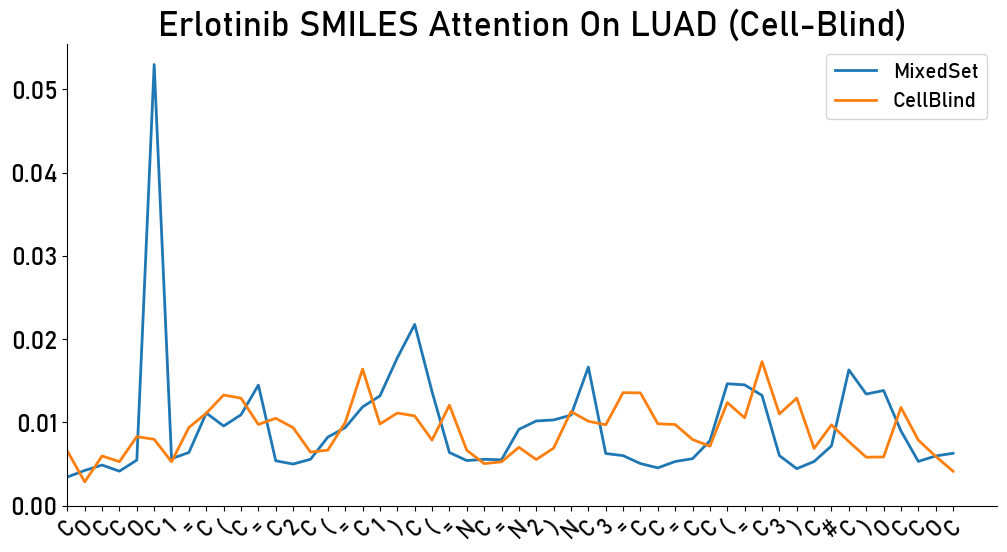

In [35]:
# 取df_Erlotinib_MixedSet_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_MixedSet_CellBlind.iloc[1, :].values
mixed_att = df_Erlotinib_MixedSet_CellBlind.iloc[2, :].values.astype(float)
cellblind_att = df_Erlotinib_MixedSet_CellBlind.iloc[3, :].values.astype(float)
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(mixed_att, label='MixedSet',linewidth=2)
plt.plot(cellblind_att, label='CellBlind',linewidth=2)
# 显示label
plt.legend(fontsize=15)
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On LUAD (Cell-Blind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_Mixed&CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
# HCC827 PC14
df_Erlotinib_HCC827_PC14 = pd.read_csv('Erlotinib_HCC827&PC14.csv',index_col=0,header=None, dtype=str)
# 去掉第一行
# df_Erlotinib_MixedSet_CellBlind = df_Erlotinib_MixedSet_CellBlind.drop(index=0)
df_Erlotinib_HCC827_PC14.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,,,,,,,,,,,,,,,,,,,,,
0,38,35,38,38,35,38,6,37,38,4,...,5,38,45,38,5,35,38,38,35,38
1,C,O,C,C,O,C,1,=,C,(,...,),C,#,C,),O,C,C,O,C
2,0.003299,0.00433,0.004937,0.00442,0.006209,0.051628,0.005793,0.00546,0.007286,0.00509,...,0.00523,0.006543,0.009678,0.026026,0.02133,0.022416,0.00852,0.005655,0.005633,0.006658
3,0.003584,0.004126,0.004817,0.00387,0.004737,0.05433,0.005499,0.007316,0.014962,0.014049,...,0.003658,0.004068,0.004697,0.00659,0.005482,0.005237,0.009441,0.004974,0.00631,0.005922


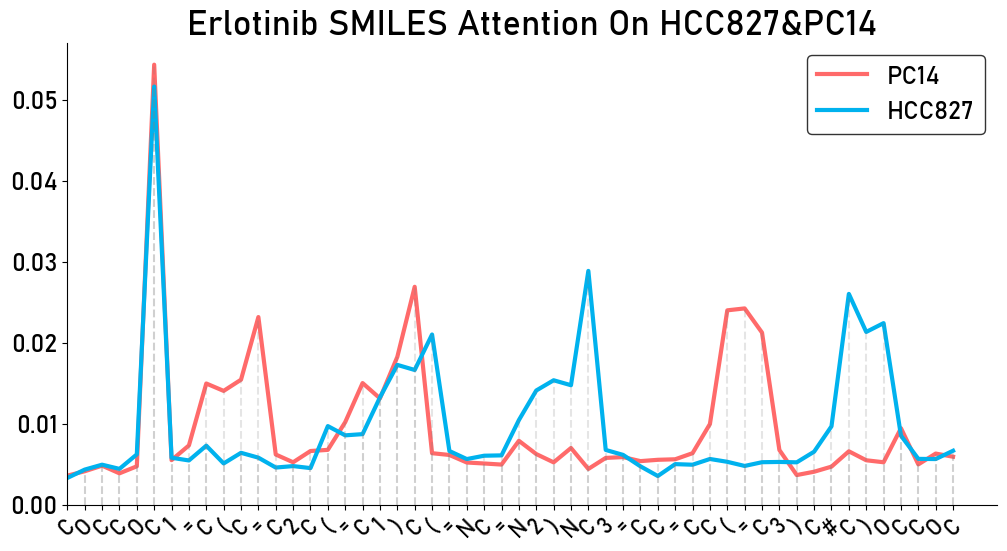

In [37]:
# 取df_Erlotinib_MixedSet_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_HCC827_PC14.iloc[1, :].values
HCC827_att = df_Erlotinib_HCC827_PC14.iloc[2, :].values.astype(float)
PC14_att = df_Erlotinib_HCC827_PC14.iloc[3, :].values.astype(float)
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}
# x = np.arange(len(Erlotinib_smiles))
# # 创建插值函数
# spl_HCC827 = make_interp_spline(x, HCC827_att)
# spl_PC14 = make_interp_spline(x, PC14_att)
# 
# # 创建更密集的x值
# xnew = np.linspace(x.min(), x.max(), 500)
# 
# # 使用插值函数计算新的y值
# HCC827_att_smooth = spl_HCC827(xnew)
# PC14_att_smooth = spl_PC14(xnew)

plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(PC14_att, label='PC14',linewidth=3, color='#FF6A6A')
plt.plot(HCC827_att, label='HCC827',linewidth=3, color='#00B2EE')
# 每个点与X轴加上虚线
for i in range(len(HCC827_att)):
    plt.vlines(i, 0, HCC827_att[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(PC14_att)):
    plt.vlines(i, 0, PC14_att[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On HCC827&PC14', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_HCC827&PC14.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
# HCC827
df_Erlotinib_HCC827_Mixed_CellBlind = pd.read_csv('Erlotinib_MixedSet&CellBlind.csv',index_col=0,header=None, dtype=str)
# 去掉第一行
# df_Erlotinib_MixedSet_CellBlind = df_Erlotinib_MixedSet_CellBlind.drop(index=0)
df_Erlotinib_HCC827_Mixed_CellBlind.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,,,,,,,,,,,,,,,,,,,,,
0,38,35,38,38,35,38,6,37,38,4,...,5,38,45,38,5,35,38,38,35,38
1,C,O,C,C,O,C,1,=,C,(,...,),C,#,C,),O,C,C,O,C
2,0.003441373,0.004227954,0.004877217,0.004145255,0.005473035,0.05297914,0.005646021,0.006387842,0.011124036,0.009569885,...,0.004443945,0.005305588,0.007187839,0.016307912,0.013405883,0.013826711,0.008980575,0.005314586,0.005971302,0.006289825
3,0.006564795,0.002853644,0.005970444,0.005283537,0.00829527,0.007969339,0.005271394,0.009390259,0.011105644,0.013289003,...,0.012916459,0.006880187,0.009706578,0.007694119,0.005821197,0.005852738,0.011792211,0.007875927,0.005921335,0.004140577


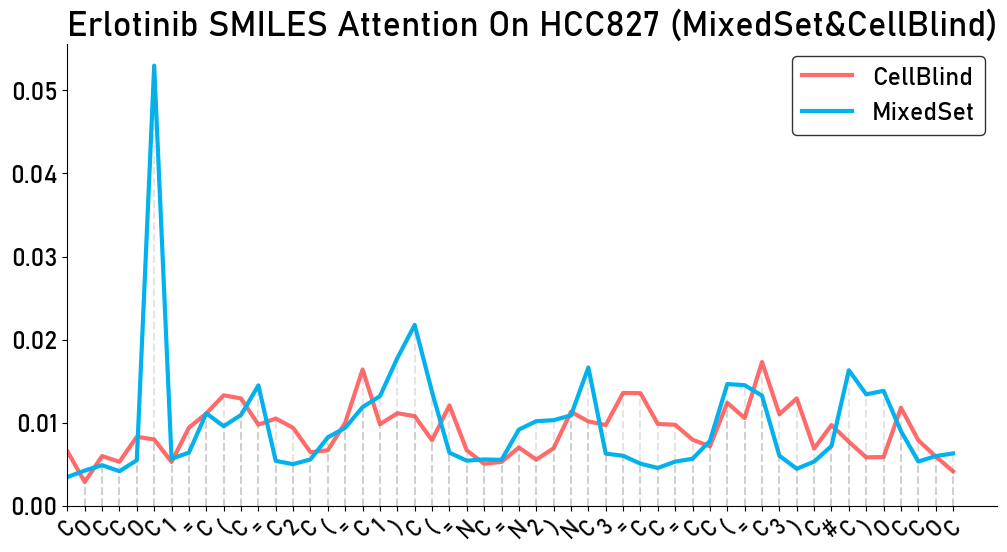

In [39]:
# 取df_Erlotinib_HCC827_Mixed_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[1, :].values
HCC827_Mixed = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[2, :].values.astype(float)
HCC827_CellBlind = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[3, :].values.astype(float)
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(HCC827_CellBlind, label='CellBlind',linewidth=3, color='#FF6A6A')
plt.plot(HCC827_Mixed, label='MixedSet',linewidth=3, color='#00B2EE')
# 每个点与X轴加上虚线
for i in range(len(HCC827_CellBlind)):
    plt.vlines(i, 0, HCC827_CellBlind[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(HCC827_Mixed)):
    plt.vlines(i, 0, HCC827_Mixed[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On HCC827 (MixedSet&CellBlind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_HCC827_Mixed&CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()


In [40]:
# PC14
df_Erlotinib_PC14_Mixed_CellBlind = pd.read_csv('Erlotinib_PC14_MixedSet&CellBlind.csv',index_col=0,header=None, dtype=str)
# 去掉第一行
# df_Erlotinib_MixedSet_CellBlind = df_Erlotinib_MixedSet_CellBlind.drop(index=0)
df_Erlotinib_PC14_Mixed_CellBlind.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,,,,,,,,,,,,,,,,,,,,,
0,38,35,38,38,35,38,6,37,38,4,...,5,38,45,38,5,35,38,38,35,38
1,C,O,C,C,O,C,1,=,C,(,...,),C,#,C,),O,C,C,O,C
2,0.003583779,0.004126188,0.004817098,0.003870389,0.004736577,0.054329842,0.00549863,0.00731571,0.014962277,0.014049462,...,0.003657557,0.004067709,0.004697397,0.006590021,0.005481569,0.005237354,0.009440726,0.004974457,0.006310102,0.005922098
3,0.006468267,0.002861602,0.005021571,0.005931099,0.010602857,0.006637208,0.005194581,0.013820236,0.014784254,0.016362643,...,0.008836783,0.005946063,0.004664169,0.007042124,0.007274111,0.007042444,0.015221387,0.007776811,0.006665342,0.003808043


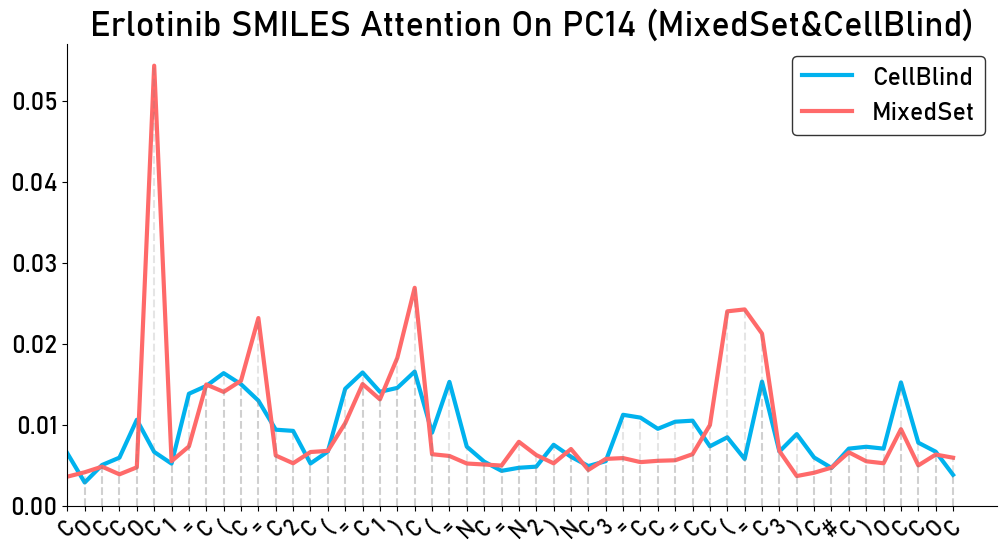

In [41]:
# 取df_Erlotinib_PC14_Mixed_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_PC14_Mixed_CellBlind.iloc[1, :].values
PC14_Mixed = df_Erlotinib_PC14_Mixed_CellBlind.iloc[2, :].values.astype(float)
PC14_CellBlind = df_Erlotinib_PC14_Mixed_CellBlind.iloc[3, :].values.astype(float)
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(PC14_CellBlind, label='CellBlind',linewidth=3, color='#00B2EE')
plt.plot(PC14_Mixed, label='MixedSet',linewidth=3, color='#FF6A6A')
# 每个点与X轴加上虚线
for i in range(len(PC14_CellBlind)):
    plt.vlines(i, 0, PC14_CellBlind[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(PC14_Mixed)):
    plt.vlines(i, 0, PC14_Mixed[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On PC14 (MixedSet&CellBlind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_PC-14_Mixed&CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()

# LUAD中发生EGFR突变的药效分析

In [42]:
df_cell_blind_drugs = pd.read_csv('CellBlind_EGFR_drugs_IC50&Prediction.csv')
# 去掉OncotreeCode列
df_cell_blind_drugs = df_cell_blind_drugs.drop(columns='OncotreeCode')
# 将IC50列改成Ground Truth，prediction列改成Prediction
df_cell_blind_drugs.columns = ['drug','cell_line','Ground Truth','Prediction']
print(df_cell_blind_drugs.shape)
df_cell_blind_drugs.head(20)

(16, 4)


,drug,cell_line,Ground Truth,Prediction
0,Afatinib,HCC827,-3.935928,0.854371
1,Erlotinib,HCC827,-2.707414,3.097792
2,Gefitinib,HCC827,-2.738697,3.107241
3,Osimertinib,HCC827,-3.593735,1.613732
4,Afatinib,PC14,-3.530785,1.417494
5,Erlotinib,PC14,-2.165833,2.967352
6,Gefitinib,PC14,-1.397133,3.490118
7,Osimertinib,PC14,-3.304462,1.406334
8,Afatinib,NCIH2228,2.361375,0.878386
9,Erlotinib,NCIH2228,3.922373,3.343516


In [43]:
# 根据cell_line分组，求出每个cell_line的IC50列,prediction列的均值
df_cell_blind_drugs_mean = df_cell_blind_drugs[['cell_line','Ground Truth','Prediction']].groupby('cell_line').mean()
# cell_line按照[HCC827,PC14,NCIH2228,EKVX]排序
df_cell_blind_drugs_mean = df_cell_blind_drugs_mean.reindex(['HCC827','PC14','NCIH2228','EKVX'])
# 将IC50列改成Ground Truth，prediction列改成Prediction
df_cell_blind_drugs_mean.columns = ['Ground Truth','Prediction']
print(df_cell_blind_drugs_mean.shape)
df_cell_blind_drugs_mean.head(20)

(4, 2)


,Ground Truth,Prediction
cell_line,,
HCC827,-3.243944,2.168284
PC14,-2.599553,2.320324
NCIH2228,3.345796,2.252594
EKVX,1.499043,0.179884


In [44]:
df_mix_set_drugs = pd.read_csv('Mixed_EGFR_drugs_IC50&Prediction.csv')
# 去掉OncotreeCode列
df_mix_set_drugs = df_mix_set_drugs.drop(columns='OncotreeCode')
# 将IC50列改成Ground Truth，prediction列改成Prediction
df_mix_set_drugs.columns = ['drug','cell_line','Ground Truth','Prediction']

print(df_mix_set_drugs.shape)
df_mix_set_drugs.head(20)

(4, 4)


,drug,cell_line,Ground Truth,Prediction
0,Erlotinib,HCC827,-2.707414,-0.576975
1,Erlotinib,PC14,-2.165833,-1.300865
2,Erlotinib,NCIH2228,3.922373,3.404778
3,Erlotinib,EKVX,1.720419,2.329803


In [45]:
df_mix_set_drugs_mean = df_mix_set_drugs[['cell_line','Ground Truth','Prediction']].groupby('cell_line').mean()
df_mix_set_drugs_mean = df_mix_set_drugs_mean.reindex(['HCC827','PC14'])
df_mix_set_drugs_mean.columns = ['Ground Truth','Prediction']
print(df_mix_set_drugs_mean.shape)
df_mix_set_drugs_mean.head(20)

(2, 2)


,Ground Truth,Prediction
cell_line,,
HCC827,-2.707414,-0.576975
PC14,-2.165833,-1.300865


In [46]:
# 将df_cell_blind_drugs数据形式更改，将IC50和prediction列合并成一列，列名为value，将IC50和prediction列的列名合并成一列，列名为variable
# Melt the DataFrame with a different value_name
df_cell_blind_drugs = df_cell_blind_drugs.melt(id_vars=['cell_line', 'drug'], value_vars=['Ground Truth', 'Prediction'], var_name='variable', value_name='result')
# 根据cell_line和drug排序
df_cell_blind_drugs = df_cell_blind_drugs.sort_values(by=['drug'])
print(df_cell_blind_drugs.shape)
df_cell_blind_drugs.head(32)

(32, 4)


,cell_line,drug,variable,result
0,HCC827,Afatinib,Ground Truth,-3.935928
20,PC14,Afatinib,Prediction,1.417494
16,HCC827,Afatinib,Prediction,0.854371
8,NCIH2228,Afatinib,Ground Truth,2.361375
28,EKVX,Afatinib,Prediction,-0.608043
12,EKVX,Afatinib,Ground Truth,0.370903
24,NCIH2228,Afatinib,Prediction,0.878386
4,PC14,Afatinib,Ground Truth,-3.530785
29,EKVX,Erlotinib,Prediction,0.636531
9,NCIH2228,Erlotinib,Ground Truth,3.922373


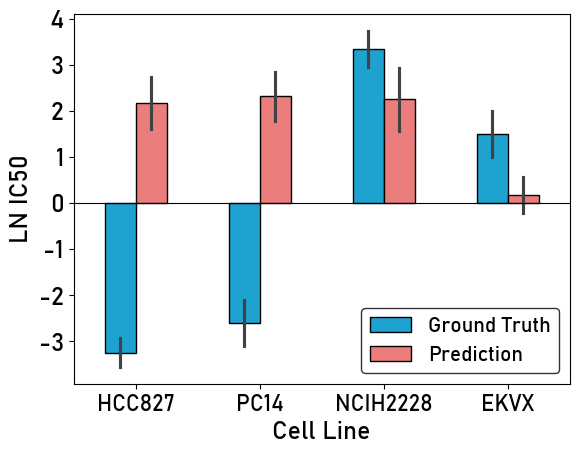

In [47]:
# 画柱状图，要求：以cell_line为X轴，画出每个cell_line的每个drug对应的result，分成两个柱子，一个柱子是正常的，一个柱子是带条纹的，带条纹的是prediction，正常的是IC50；并且不同的drug颜色不同，颜色分成两种，
# 设置画布大小
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}
# plt.figure(figsize=(12, 6))
# 画柱状图
sns.barplot(x='cell_line', y='result', hue='variable', data=df_cell_blind_drugs, palette=palette,edgecolor='black',width=0.5,errorbar='se')
# 设计legend样式
plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
# title
# plt.title('EGFR Drugs IC50&Prediction On LUAD (Cell-Blind)', fontsize=25)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('LN IC50', fontsize=18)
# 保存图片
# plt.savefig('img/EGFR_Drugs_IC50&Prediction_On_LUAD_Cell_Blind.png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
# 将df_mix_set_drugs melt操作，将IC50和prediction列合并成一列，列名为value，将IC50和prediction列的列名合并成一列，列名为variable
# Melt the DataFrame with a different value_name
df_mix_set_drugs = df_mix_set_drugs.melt(id_vars=['cell_line', 'drug'], value_vars=['Ground Truth', 'Prediction'], var_name='variable', value_name='result')
# 根据cell_line和drug排序
df_mix_set_drugs = df_mix_set_drugs.sort_values(by=['drug'])
print(df_mix_set_drugs.shape)
df_mix_set_drugs.head(32)

(8, 4)


,cell_line,drug,variable,result
0,HCC827,Erlotinib,Ground Truth,-2.707414
1,PC14,Erlotinib,Ground Truth,-2.165833
2,NCIH2228,Erlotinib,Ground Truth,3.922373
3,EKVX,Erlotinib,Ground Truth,1.720419
4,HCC827,Erlotinib,Prediction,-0.576975
5,PC14,Erlotinib,Prediction,-1.300865
6,NCIH2228,Erlotinib,Prediction,3.404778
7,EKVX,Erlotinib,Prediction,2.329803


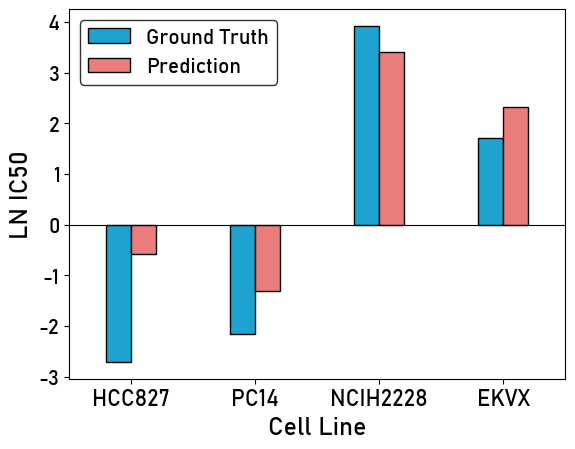

In [49]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# df_mix_set_drugs_mean画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
# 设置画布大小
# plt.figure(figsize=(6, 6))
# 画柱状图
sns.barplot(x='cell_line', y='result', hue='variable', data=df_mix_set_drugs, palette=palette,edgecolor='black',width=0.4)
# 设计legend样式
plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
# title
# plt.title('Erlotinib IC50&Prediction On HCC827&PC14 (MixedSet)', fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=15)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('LN IC50', fontsize=18)
# 保存图片
# plt.savefig('img/EGFR_Drugs_IC50&Prediction_On_LUAD_MixedSet.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x600 with 0 Axes>

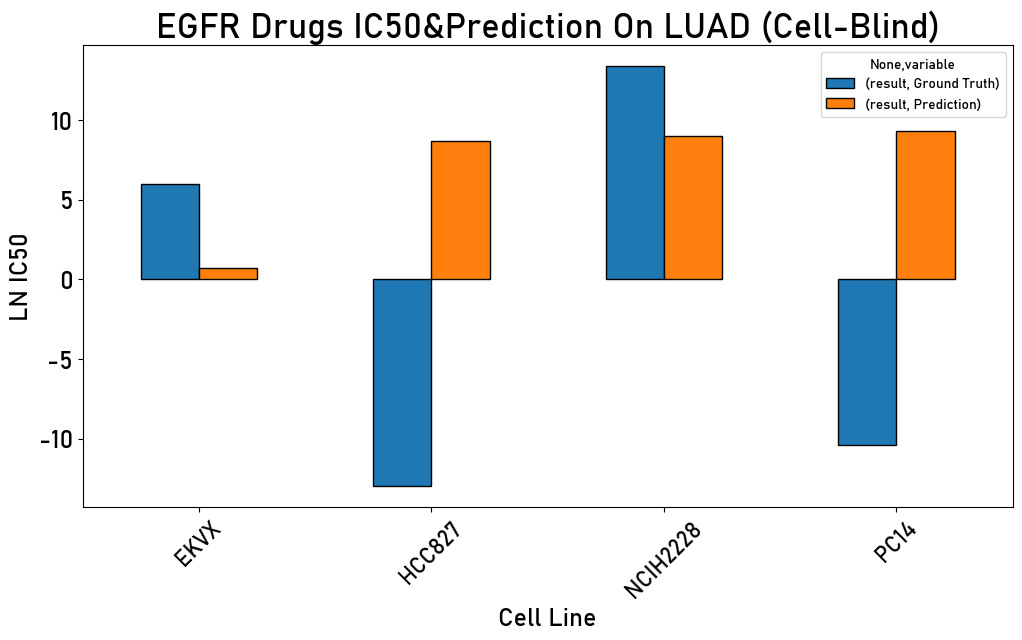

In [50]:
# 用plot画柱状图，要求：以cell_line为X轴，画出每个cell_line的每个drug对应的result，按照variable分成两个柱子
# 设置画布大小
plt.figure(figsize=(12, 6))
# 画柱状图
df_cell_blind_drugs.groupby(['cell_line', 'variable']).sum().unstack().plot(kind='bar', figsize=(12, 6), width=0.5, edgecolor='black')
# title
plt.title('EGFR Drugs IC50&Prediction On LUAD (Cell-Blind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('LN IC50', fontsize=18)
# 保存图片
# plt.savefig('EGFR_Drugs_IC50&Prediction_On_LUAD_Cell_Blind.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
# 根据cell_line分组，求出每个cell_line的IC50列,prediction列的误差RMSE
df_cell_blind_drugs_rmse = df_cell_blind_drugs[['cell_line','IC50','prediction']].groupby('cell_line').apply(lambda x: np.sqrt(np.mean((x['IC50'] - x['prediction'])**2)), include_groups=False)
# cell_line按照[HCC827,PC14,NCIH2228,EKVX]排序
df_cell_blind_drugs_rmse = df_cell_blind_drugs_rmse.reindex(['HCC827','PC14','NCIH2228','EKVX'])
# 将IC50列改成Ground Truth，prediction列改成Prediction
df_cell_blind_drugs_rmse.columns = ['RMSE']
print(df_cell_blind_drugs_rmse.shape)
df_cell_blind_drugs_rmse.head(20)

KeyError: "['IC50', 'prediction'] not in index"

In [ ]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# df_cell_blind_drugs_rmse画柱状图，每个cell_line的IC50列,prediction列的均值
df_cell_blind_drugs_rmse.plot(kind='bar', figsize=(6, 6), width=0.5, edgecolor='black')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
plt.title('EGFR Drugs RMSE On LUAD (Cell-Blind)', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
# plt.savefig('EGFR_Drugs_RMSE_On_LUAD_Cell_Blind.png', dpi=300, bbox_inches='tight')
plt.show()

# 靶向药与非靶向药 皮尔逊相关系数对比

In [ ]:
# 读取drug_sensitivity数据
df_drug_sensitivity = pd.read_csv('../../data/drug_sensitivity_lung_CellBlind_test&prediction_V2.csv')
drug_name_EGFR = ['Erlotinib','Gefitinib','Afatinib','Osimertinib']
cell_line_LUAD = ['NCIH2228','HCC827','EKVX','PC14']
# 将df_drug_sensitivity数据分成两部分，一部分是靶向药，一部分是非靶向药
df_drug_sensitivity_EGFR = df_drug_sensitivity[(df_drug_sensitivity['cell_line'].isin(cell_line_LUAD)) & (df_drug_sensitivity['drug'].isin(drug_name_EGFR))][['cell_line','drug','IC50','prediction']]
df_drug_sensitivity_non_EGFR = df_drug_sensitivity[(df_drug_sensitivity['cell_line'].isin(cell_line_LUAD)) & (~df_drug_sensitivity['drug'].isin(drug_name_EGFR))][['cell_line','drug','IC50','prediction']]
# 将IC50列改成Ground Truth，prediction列改成Prediction
df_drug_sensitivity_non_EGFR.columns = ['cell_line','drug','Ground Truth','Prediction']
print(df_drug_sensitivity_EGFR.shape)
print(df_drug_sensitivity_non_EGFR.shape)
df_drug_sensitivity_EGFR.head()

In [ ]:
# 分组计算每个cell_line的IC50列,prediction列的的RMSE
df_drug_sensitivity_EGFR_rmse = df_drug_sensitivity_EGFR[['cell_line','IC50','prediction']].groupby('cell_line').apply(lambda x: np.sqrt(np.mean((x['IC50'] - x['prediction'])**2)), include_groups=False)
df_drug_sensitivity_non_EGFR_rmse = df_drug_sensitivity_non_EGFR[['cell_line','IC50','prediction']].groupby('cell_line').apply(lambda x: np.sqrt(np.mean((x['IC50'] - x['prediction'])**2)), include_groups=False)
print(df_drug_sensitivity_EGFR_rmse.shape)
print(df_drug_sensitivity_non_EGFR_rmse.shape)

In [ ]:
df_drug_sensitivity_EGFR_rmse

In [ ]:
df_drug_sensitivity_non_EGFR_rmse

In [ ]:
# 将df_drug_sensitivity_EGFR_rmse和df_drug_sensitivity_non_EGFR_rmse合并
df_drug_sensitivity_rmse = pd.concat([df_drug_sensitivity_EGFR_rmse, df_drug_sensitivity_non_EGFR_rmse], axis=1)
df_drug_sensitivity_rmse.columns = ['EGFR','Non-EGFR']
# Melt the DataFrame with a different value_name,保留cell_line列
df_drug_sensitivity_rmse = df_drug_sensitivity_rmse.reset_index()
df_drug_sensitivity_rmse = df_drug_sensitivity_rmse.melt(id_vars=['cell_line'], value_vars=['EGFR', 'Non-EGFR'], var_name='variable', value_name='result')
# 根据cell_line排序，cell_line按照[HCC827,PC14,NCIH2228,EKVX]排序
df_drug_sensitivity_rmse = df_drug_sensitivity_rmse.reindex([5,1,7,3,6,2,4,0])
print(df_drug_sensitivity_rmse.shape)
df_drug_sensitivity_rmse.head(20)

In [ ]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# df_drug_sensitivity_rmse画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
palette = {
    'EGFR': '#FF6A6A',
    'Non-EGFR': '#00B2EE'
}
# 设置画布大小
# plt.figure(figsize=(6, 6))
# 画柱状图
sns.barplot(x='cell_line', y='result', hue='variable', data=df_drug_sensitivity_rmse, palette=palette,edgecolor='black',width=0.4)
# 设计legend样式
plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
# title
# plt.title('EGFR&Non-EGFR Drugs RMSE On LUAD (Cell-Blind)', fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=15)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
# 保存图片
# plt.savefig('img/EGFR&Non-EGFR_Drugs_RMSE_On_LUAD_Cell_Blind.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# df_drug_sensitivity_non_EGFR中筛选出drug = [5-Fluorouracil,Bleomycin,Bortezomib,Camptothecin,Carmustine,Cisplatin,Cyclophosphamide,Cytarabine,Dactinomycin,Docetaxel,Epirubicin,Fludarabine,Gemcitabine,Irinotecan,Methotrexate,Mitoxantrone,Oxaliplatin,Paclitaxel,Podophyllotoxin bromide,SN-38,Staurosporine,Tamoxifen,Temozolomide,Teniposide,Topotecan,Vinblastine,Vincristine,Vinorelbine]的数据
chemotherapeutic_drugs = ['5-Fluorouracil','Bleomycin','Bortezomib','Camptothecin','Carmustine','Cisplatin','Cyclophosphamide','Cytarabine','Dactinomycin','Docetaxel','Epirubicin','Fludarabine','Gemcitabine','Irinotecan','Mitoxantrone','Oxaliplatin','Paclitaxel','Podophyllotoxin bromide','SN-38','Staurosporine','Tamoxifen','Temozolomide','Teniposide','Topotecan','Vinblastine','Vincristine','Vinorelbine']
# chemotherapeutic_drugs = ['Paclitaxel','Cisplatin']
df_drug_sensitivity_non_EGFR = df_drug_sensitivity_non_EGFR[df_drug_sensitivity_non_EGFR['drug'].isin(chemotherapeutic_drugs)]
print(df_drug_sensitivity_non_EGFR.shape)
df_drug_sensitivity_non_EGFR.head()

In [ ]:
# df_drug_sensitivity_non_EGFR,Melt the DataFrame with a different value_name,保留cell_line列
df_drug_sensitivity_non_EGFR = df_drug_sensitivity_non_EGFR.melt(id_vars=['cell_line', 'drug'], value_vars=['Ground Truth', 'Prediction'], var_name='variable', value_name='result')
# 根据cell_line和drug排序
# df_drug_sensitivity_non_EGFR = df_drug_sensitivity_non_EGFR.sort_values(by=['drug'])
print(df_drug_sensitivity_non_EGFR.shape)
df_drug_sensitivity_non_EGFR.head(110)


In [ ]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# df_mix_set_drugs_mean画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
# 设置画布大小
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}
# plt.figure(figsize=(6, 6))
# 画柱状图
sns.barplot(x='cell_line', y='result', hue='variable', data=df_drug_sensitivity_non_EGFR, palette=palette,edgecolor='black',width=0.4, errorbar='se')
# , errorbar='se'
# 'ci', 'pi', 'se', 'sd'
# 设计legend样式
plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
plt.axhline(0, color='black', linewidth=0.8)
# title
# plt.title('Erlotinib IC50&Prediction On HCC827&PC14 (MixedSet)', fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=15)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('LN IC50', fontsize=18)
# 保存图片
# plt.savefig('img/Non-EGFR_Drugs_IC50&Prediction_On_LUAD_CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()

# 把图画的圆润一点

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# 取df_Erlotinib_HCC827_Mixed_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[1, :].values
HCC827_Mixed = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[2, :].values.astype(float)
HCC827_CellBlind = df_Erlotinib_HCC827_Mixed_CellBlind.iloc[3, :].values.astype(float)

plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))

# 使用插值函数平滑曲线
x_old = np.arange(len(HCC827_CellBlind))
x_new = np.linspace(0, len(HCC827_CellBlind)-1, 1000)
y_CellBlind = interpolate.make_interp_spline(x_old, HCC827_CellBlind)(x_new)
y_Mixed = interpolate.make_interp_spline(x_old, HCC827_Mixed)(x_new)

plt.plot(x_new, y_CellBlind, label='CellBlind', linewidth=3, color='#FF6A6A')
plt.plot(x_new, y_Mixed, label='MixedSet', linewidth=3, color='#00B2EE')

# 每个点与X轴加上虚线
for i in range(len(HCC827_CellBlind)):
    plt.vlines(i, 0, HCC827_CellBlind[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(HCC827_Mixed)):
    plt.vlines(i, 0, HCC827_Mixed[i], linestyles='dashed', colors='grey', alpha=0.2)

# 显示label
plt.legend(fontsize=18, edgecolor='black', loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On HCC827 (MixedSet&CellBlind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(x_old, Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_HCC827_Mixed&CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 取df_Erlotinib_MixedSet_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_HCC827_PC14.iloc[1, :].values
HCC827_att = df_Erlotinib_HCC827_PC14.iloc[2, :].values.astype(float)
PC14_att = df_Erlotinib_HCC827_PC14.iloc[3, :].values.astype(float)
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}

plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
# 使用插值函数平滑曲线
x_old = np.arange(len(HCC827_att))
x_new = np.linspace(0, len(HCC827_att)-1, 1000)
y_HCC827_att = interpolate.make_interp_spline(x_old, HCC827_att)(x_new)
y_PC14_att = interpolate.make_interp_spline(x_old, PC14_att)(x_new)

plt.plot(x_new, y_PC14_att, label='PC14',linewidth=3, color='#FF6A6A')
plt.plot(x_new, y_HCC827_att, label='HCC827',linewidth=3, color='#00B2EE')
# 每个点与X轴加上虚线
for i in range(len(HCC827_att)):
    plt.vlines(i, 0, HCC827_att[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(PC14_att)):
    plt.vlines(i, 0, PC14_att[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On HCC827&PC14', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_HCC827&PC14.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 取df_Erlotinib_PC14_Mixed_CellBlind的第二行
Erlotinib_smiles = df_Erlotinib_PC14_Mixed_CellBlind.iloc[1, :].values
PC14_Mixed = df_Erlotinib_PC14_Mixed_CellBlind.iloc[2, :].values.astype(float)
PC14_CellBlind = df_Erlotinib_PC14_Mixed_CellBlind.iloc[3, :].values.astype(float)
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))

# 使用插值函数平滑曲线
x_old = np.arange(len(PC14_CellBlind))
x_new = np.linspace(0, len(PC14_CellBlind)-1, 1000)
y_PC14_CellBlind = interpolate.make_interp_spline(x_old, PC14_CellBlind)(x_new)
y_PC14_Mixed = interpolate.make_interp_spline(x_old, PC14_Mixed)(x_new)

plt.plot(x_new, y_PC14_CellBlind, label='CellBlind',linewidth=3, color='#00B2EE')
plt.plot(x_new, y_PC14_Mixed, label='MixedSet',linewidth=3, color='#FF6A6A')
# 每个点与X轴加上虚线
for i in range(len(PC14_CellBlind)):
    plt.vlines(i, 0, PC14_CellBlind[i], linestyles='dashed', colors='grey', alpha=0.2)
for i in range(len(PC14_Mixed)):
    plt.vlines(i, 0, PC14_Mixed[i], linestyles='dashed', colors='grey', alpha=0.2)
# 显示label
plt.legend(fontsize=18,edgecolor='black',loc='best')
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On PC14 (MixedSet&CellBlind)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), Erlotinib_smiles)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation_PC-14_Mixed&CellBlind.png', dpi=300, bbox_inches='tight')
plt.show()